## Data Pre-Processing 

In [2]:
# Load libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Load data
df = pd.read_csv("data.txt", delimiter="\t")

In [7]:
# Check first 1 rows
df.head(1)

,Unnamed: 0,x,y,z,label
0,0,326.488285,188.988808,-312.205307,0.0


In [8]:
# Check last 0 rows
df.tail(0)

,Unnamed: 0,x,y,z,label


In [5]:
# There are several warnings due to the solver argument in our models.
# This is not a problem, so I will disable.
# If this code is used in the future, it might be good to have warnings not disabled.

import warnings
warnings.filterwarnings('ignore')

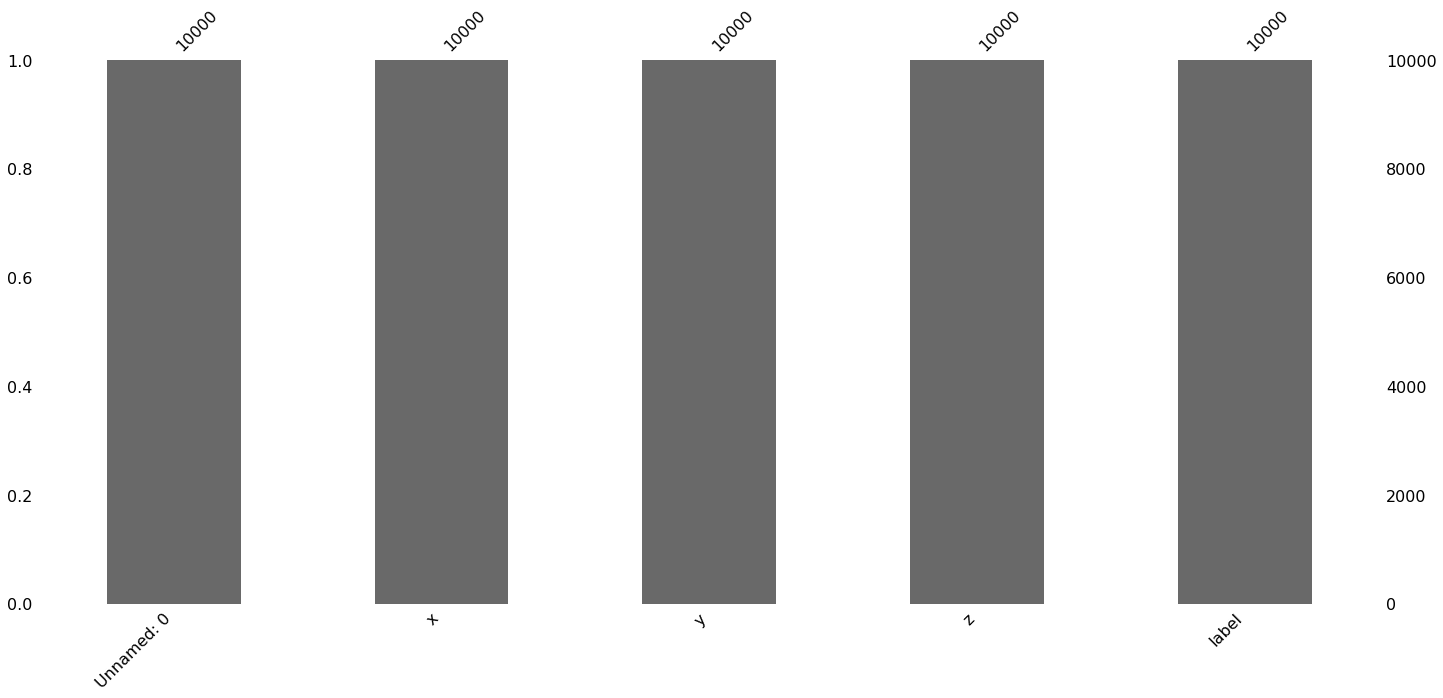

In [6]:
# Plot non-missing

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

msno.bar(df)

## (a) Segregate a test and training frame

In [7]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

## (b) Logistic Regression Model and Results

In [8]:
# Run logistic regression (C parameter control for regularization, solver warning is not a problem)
clf = LogisticRegression(C=0.0000001).fit(X_train, y_train.values.ravel())

# Check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.55
Accuracy of Logistic regression classifier on test set: 0.54


C is the trade-off parameter that determines the strength of the regularization. A higher C increases the chance of overfitting. <br>
Also, as mentioned in the book <i>Machine Learning with Python</i> from O'Reilly, <br>
<i>"There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly."</i>

Now, moving on, we will continue to evaluate our model.<br>
There are other metrics to use besides accuracy:<br>
- Precision = TP / (TP + FP);<br>
- Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate;<br>
- F1 = 2 * Precision * Recall / (Precision + Recall).

In [9]:
# Now, let's take a look at the equation. I.e., the coefficients
print("Coefficients:")
print(clf.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print("")

print("Intercept:")
print(clf.intercept_)  #Prints value for intercept/b0 
print("")

Coefficients:
[[ 2.66549056e-05  1.06541027e-04 -1.26672189e-04]]

Intercept:
[5.72610912e-06]



In [10]:
# Scikit-Learn doesn't provide the p-value. However, statsmodels do provide.
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.692818
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Wed, 05 Feb 2020   Pseudo R-squ.:               0.0003079
Time:                        12:29:57   Log-Likelihood:                -5196.1
converged:                       True   LL-Null:                       -5197.7
                                        LLR p-value:                    0.2018
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x           2.839e-05   8.03e-05      0.353      0.724      -0.000       0.000
y              0.0001   8.05e

Well, the results are not good at all... The correct thing to do is to fix this regression
and then evaluate it. However, since I've already gotten all evaluation metrics, I'll let the code
as it is. But you should have in mind that the p-values above are not significant at .5 level.

In [11]:
# If you want to predict the response for one individual:
print("Predict:")
print(clf.predict(np.array([[3, 5,8]]))) #Predicts an array of y-values with the fitted model given the inputs
print("")

Predict:
[0.]



In [12]:
print('Precision: {:.2f}'.format(precision_score(y_test, clf.predict(X_test))))
print('Recall: {:.2f}'.format(recall_score(y_test, clf.predict(X_test))))
print('F1: {:.2f}'.format(f1_score(y_test, clf.predict(X_test))))

Precision: 0.52
Recall: 0.54
F1: 0.53


Also, let's check the confusion matrix:

In [13]:
labels = np.unique(y_test)
a =  confusion_matrix(y_test, clf.predict(X_test), labels=labels)
print("Confusion Matrix\n",pd.DataFrame(a, index=labels, columns=labels))

Confusion Matrix
      0.0  1.0
0.0  676  604
1.0  556  664


In [14]:
# Another way to look at the Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_test, clf.predict(X_test), labels=labels).ravel()
print("TN = ", tn, "\nFP = ", fp, "\nFN = ",fn, "\nTP = ", tp)

TN =  676 
FP =  604 
FN =  556 
TP =  664


In [15]:
# Checking the AUC
fpr, tpr, threshold = metrics.roc_curve(y_test, clf.predict(X_test))

x = fpr
y = tpr 

# AUC
auc = np.trapz(y,x)
print(auc)

0.5361936475409835


In [16]:
list(df.columns[1:4])

['x', 'y', 'z']

In [17]:
range(df.shape[1]-2)

range(0, 3)

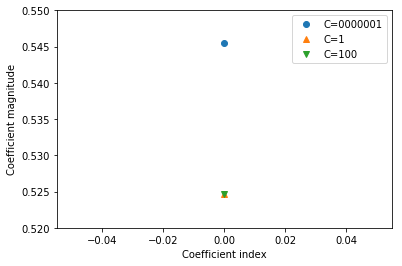

In [18]:
# Checking the change in accuracy according to change in C
clf0000001 = LogisticRegression(C=0.0000001).fit(X_train, y_train.values.ravel())
clf1 = LogisticRegression(C=1).fit(X_train, y_train.values.ravel())
clf100 = LogisticRegression(C=100).fit(X_train, y_train.values.ravel())

plt.plot(clf0000001.score(X_train, y_train), 'o', label="C=0000001")
plt.plot(clf1.score(X_train, y_train), '^', label="C=1")
plt.plot(clf100.score(X_train, y_train), 'v', label="C=100")
plt.ylim(0.52, 0.55)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

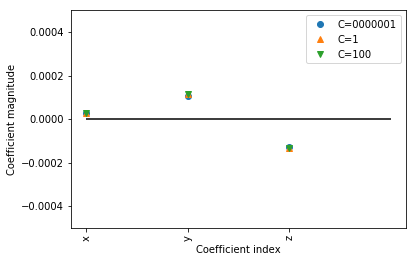

In [19]:
# Checking the change in coefficients according to change in C
clf0000001 = LogisticRegression(C=0.0000001).fit(X_train, y_train.values.ravel())
clf1 = LogisticRegression(C=1).fit(X_train, y_train.values.ravel())
clf100 = LogisticRegression(C=100).fit(X_train, y_train.values.ravel())

plt.plot(clf0000001.coef_.T, 'o', label="C=0000001")
plt.plot(clf1.coef_.T, '^', label="C=1")
plt.plot(clf100.coef_.T, 'v', label="C=100")
plt.xticks(range(df.shape[1]-2), list(df.columns[1:4]), rotation=90)
plt.hlines(0, 0, df.shape[1]-2)
plt.ylim(-0.0005, 0.0005)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Note: Both graphs can be improved by using a loop and increasing the number of C's tested (we might do this later).

As we can see, the accuracy of the chosen model is not so good. However, we didn't normalize our data.<br>
In other words, the metrics are in different scale and our model could benefit from normalization.

In [20]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

# scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run logistic regression (C parameter control for regularization won't improve in this case)
clf_scaled = LogisticRegression().fit(X_train_scaled, y_train.values.ravel())

# Check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.52
Accuracy of Logistic regression classifier on test set: 0.51


In [21]:
# Now, let's take a look at the equation. I.e., the coefficients
print("Coefficients:")
print(clf_scaled.coef_) #Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print("")

print("Intercept:")
print(clf_scaled.intercept_)  #Prints value for intercept/b0 
print("")

Coefficients:
[[ 0.02760823  0.11426563 -0.13323565]]

Intercept:
[0.02626075]



In [22]:
# If you want to predict the response for one individual:
print("Predict:")
print(clf_scaled.predict(np.array([[3, 5,8]]))) #Predicts an array of y-values with the fitted model given the inputs
print("")

Predict:
[0.]



In [23]:
print('Precision: {:.2f}'.format(precision_score(y_test, clf_scaled.predict(X_test_scaled))))
print('Recall: {:.2f}'.format(recall_score(y_test, clf_scaled.predict(X_test_scaled))))
print('F1: {:.2f}'.format(f1_score(y_test, clf_scaled.predict(X_test_scaled))))

print("")

labels = np.unique(y_test)
a =  confusion_matrix(y_test, clf_scaled.predict(X_test_scaled), labels=labels)
print("Confusion Matrix\n",pd.DataFrame(a, index=labels, columns=labels))

print("")

tn, fp, fn, tp = confusion_matrix(y_test, clf_scaled.predict(X_test_scaled), labels=labels).ravel()
print("TN = ", tn, "\nFP = ", fp, "\nFN = ",fn, "\nTP = ", tp)

Precision: 0.50
Recall: 0.72
F1: 0.59

Confusion Matrix
      0.0  1.0
0.0  393  887
1.0  336  884

TN =  393 
FP =  887 
FN =  336 
TP =  884


In [24]:
fpr, tpr, threshold = metrics.roc_curve(y_test, clf_scaled.predict(X_test_scaled))

x = fpr
y = tpr 

# AUC
auc = np.trapz(y,x)
print(auc)

0.5158107069672131


It looks like scale isn't the problem.<br>
The logistic regression doesn't look like the best option here.

## Random Forest

<b>Why Random Forest?</b><br>
A few models could be tested here, such as Decision Trees, SVM and so on.<br>
However, since I have to choose one, I would like to go with Random Forest because:<br>
- Random Forest is a much robust model, i.e. it has a high performance when comparing to models such as logistic regression;<br>
- Since we average several trees, there is less variance than with decision tree (which would be another good choice);<br>

The main disadvantages are:<br>
- It's less interpretable than models such as decision trees or even logistic regression;<br>
- Depending on how much trees you are training, it can have computational costs. This is not our case, so this problem can be ignored;<br>
- Considerable risk of overfitting (even though combining several trees reduces the risk compared to a decision tree).<br>

Two nice sources to understand Random Forest:
- https://towardsdatascience.com/why-random-forest-is-my-favorite-machine-learning-model-b97651fa3706; <br>
- https://towardsdatascience.com/understanding-random-forest-58381e0602d2; <br>

In [25]:
# Carrega as bibliotecas
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

# run random forest classifier
clf_rf = RandomForestClassifier().fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf_rf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf_rf.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.73


/Users/andremota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


<b>Regarding the model above:</b> the difference among the performance on the training and testing set is too large.<br>
I.e., the model might be overfitting. By lowering the max_depth argument, we might get better results.<br>
Let's try a new approach:

In [26]:
# run random forest classifier with max_depth different from the default 
clf_max_depth = RandomForestClassifier(max_depth=15,max_features=3, n_estimators=100).fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf_max_depth.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf_max_depth.score(X_test, y_test)))

/Users/andremota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy of RF classifier on training set: 0.88
Accuracy of RF classifier on test set: 0.79


In [27]:
print('Precision: {:.2f}'.format(precision_score(y_test, clf_max_depth.predict(X_test))))
print('Recall: {:.2f}'.format(recall_score(y_test, clf_max_depth.predict(X_test))))
print('F1: {:.2f}'.format(f1_score(y_test, clf_max_depth.predict(X_test))))

print("")

labels = np.unique(y_test)
a =  confusion_matrix(y_test, clf_max_depth.predict(X_test), labels=labels)
print("Confusion Matrix\n",pd.DataFrame(a, index=labels, columns=labels))

print("")

tn, fp, fn, tp = confusion_matrix(y_test, clf_max_depth.predict(X_test), labels=labels).ravel()
print("TN = ", tn, "\nFP = ", fp, "\nFN = ",fn, "\nTP = ", tp)

Precision: 0.78
Recall: 0.79
F1: 0.79

Confusion Matrix
       0.0  1.0
0.0  1007  273
1.0   255  965

TN =  1007 
FP =  273 
FN =  255 
TP =  965


In [28]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, clf_max_depth.predict(X_test))

# AUC
auc = np.trapz(tpr,fpr)
print(auc)

0.7888511782786886


This model is our final choice.

## SVM

In [29]:
# Load data
import pandas as pd
df = pd.read_csv("df_points.txt", delimiter="\t")

In [30]:
df.shape

(10000, 5)

In [31]:
df.shape

(10000, 5)

In [41]:
from sklearn.svm import LinearSVC

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

clf = LinearSVC(C=.0001).fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

/Users/andremota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.54
Accuracy of Linear SVC classifier on test set: 0.53


/Users/andremota/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

# scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run SVM
clf = LinearSVC().fit(X_train_scaled, y_train)

# Check accuracy
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.52
Accuracy of Logistic regression classifier on test set: 0.51


/Users/andremota/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## KNN

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df[['x','y','z']], df[['label']], random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.77


/Users/andremota/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
